## Adaptation and Learning HW3 Q7

#### Initial setting

In [95]:
# import libraries
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt
from tqdm import tqdm

In [96]:
# set parameters
params = {
    'rho': 1.0,
    'mu':0.01,
    'M': 10,
    'N': 250,
    'maxit': 2000,
    'w_gt': np.random.randn(10),
    'w_init': np.zeros(10),
}

In [144]:
# create data set
w_gt = params['w_gt']
h_s = np.random.randn(params['M'],params['N'])+2 # class +1
h_t = np.random.randn(params['M'],params['N'])-2 # class -1
h = np.concatenate([h_s,h_t],1)
sigma = np.concatenate([np.ones(params['N']), -np.ones(params['N'])])
gamma_s = (h_s.T@w_gt>=0)*2.0 - 1.0
gamma_t = (h_t.T@w_gt>=0)*2.0 - 1.0

#### Define required functions

In [145]:
def risk_logistic(w, gamma, h, params):
    return np.log(1 + np.exp(-gamma*(np.transpose(h)@w)))

In [146]:
def Pw(w, gamma, h, params):
    return params['rho']*linalg.norm(w)**2 + 1/params['N'] * sum(risk_logistic(w, gamma, h, params))

In [147]:
def grad_logistic(w, gamma_m, h_m, params):
    return 2*params['rho']*w - gamma_m*h_m / (1 + np.exp(gamma_m*h_m@w))

In [148]:
def sgd(gamma, h, params, gamma_t, h_t, alpha=np.ones(params['N'])):
#     np.random.seed(seed=1)
    w = params['w_init']
    mu = params['mu']
    loss = []
    loss_t = []
    for i in range(params['maxit']):
        loss.append(Pw(w, gamma, h, params))
        loss_t.append(Pw(w, gamma_t, h_t, params))
        j = np.random.randint(params['N'])
        w = w - mu * alpha[j] * grad_logistic(w, gamma[j], h[:,j], params)
    return w, loss, loss_t

#### train w_x to classify the class sigma

In [149]:
w_x, loss, loss_t = sgd(sigma, h, params, gamma_t, h_t, alpha=np.ones(params['N']))

0.3539813978851673


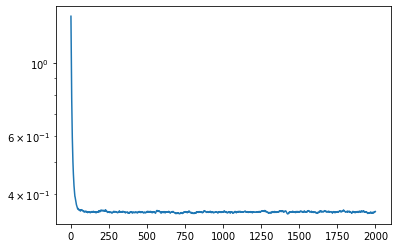

In [150]:
# check convergence with the algorithm
x = range(params['maxit'])
y = loss
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x,y)
plt.yscale('log')
plt.show()

#### calculate N_S, N_T, Alpha with obtained w_x

In [151]:
N_S = np.count_nonzero((h.T@w_x >= 0)*1.0)
N_T = h.shape[1] - N_S
alpha = N_S / N_T * np.exp(-h_s.T@w_x)

#### train w_star with Obtained alpha and h_s, gamma_s

In [152]:
w_star, loss_star, loss_t = sgd(gamma_s, h_s, params, gamma_t, h_t, alpha = alpha)

#### check if the cost defined with the difference between true gamma_t and calculated gamma_t converges

0.3539813978851673


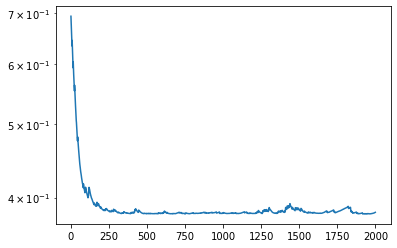

In [153]:
# check convergence with the algorithm
x = range(params['maxit'])
y = loss_t
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x,y)
plt.yscale('log')
plt.show()

#### compare true gamma_t in target domain and calculated gamma_t

In [154]:
gamma_tr = (h_t.T@w_star>=0)*2.0-1.0
(gamma_t - gamma_tr)

array([0., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 2., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.